In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps

from RGBcubical_utils import compute_RGB_contributions, difference_RGB_ECP, approximate_difference_RGB_ECP

from tqdm.notebook import tqdm

# load images

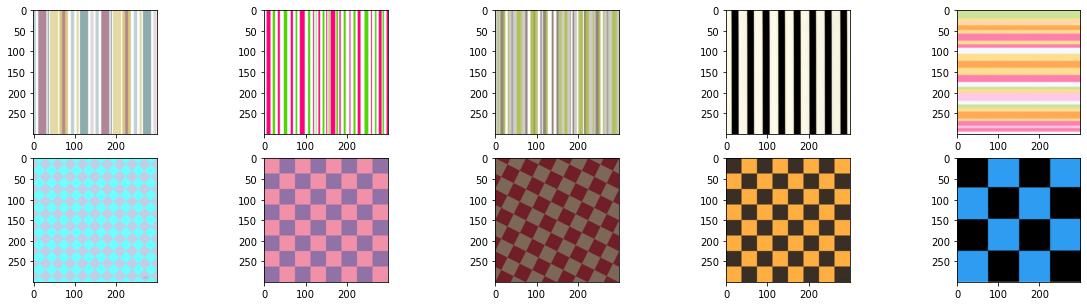

In [2]:
NUMBER_OF_SAMPLES = 5

images = []

for i in range(NUMBER_OF_SAMPLES):
    images.append(Image.open("data/textures/banded/banded_{}.jpg".format(i)))
    
for i in range(NUMBER_OF_SAMPLES):
    images.append(Image.open("data/textures/chequered/chequered_{}.jpg".format(i)))
    
grayscale_images = [ImageOps.grayscale(img) for img in images]
    
np_images = [np.int16(img) for img in images]
np_grayscale_images = [np.expand_dims(np.int16(img), axis=2) for img in grayscale_images]

fig, axs = plt.subplots(2, NUMBER_OF_SAMPLES,
                       figsize=(20, 5))

for i in range(NUMBER_OF_SAMPLES):
    axs[0, i].imshow(images[i])
    axs[1, i].imshow(images[NUMBER_OF_SAMPLES+i])

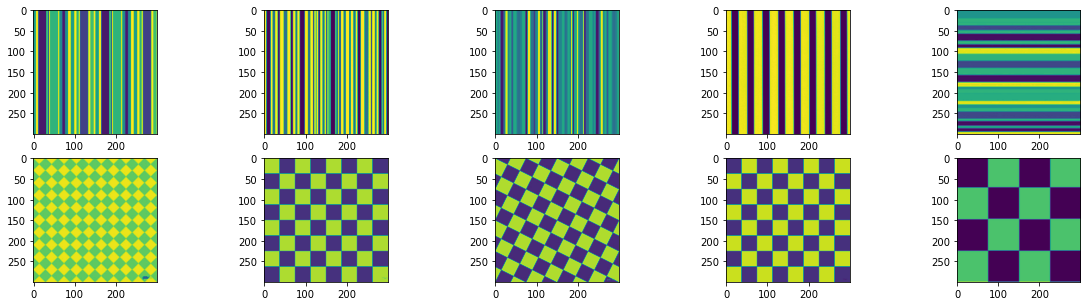

In [3]:
fig, axs = plt.subplots(2, NUMBER_OF_SAMPLES,
                       figsize=(20, 5))

for i in range(NUMBER_OF_SAMPLES):
    axs[0, i].imshow(grayscale_images[i])
    axs[1, i].imshow(grayscale_images[NUMBER_OF_SAMPLES+i])

In [4]:
print(np_images[0].shape)
print(np_grayscale_images[0].shape)

(300, 300, 3)
(300, 300, 1)


# Compute RGB Euler profiles

In [5]:
list_of_RGB_contributions = [compute_RGB_contributions(img) for img in tqdm(np_images)]

  0%|          | 0/10 [00:00<?, ?it/s]

# Distance matrix

In [6]:
%%time
distance_matrix = np.zeros((NUMBER_OF_SAMPLES*2, NUMBER_OF_SAMPLES*2))

for i in tqdm(range(len(list_of_RGB_contributions))):
    for j in tqdm(range(i+1, len(list_of_RGB_contributions))):
        distance_matrix[i,j] = difference_RGB_ECP(list_of_RGB_contributions[i], list_of_RGB_contributions[j])
        distance_matrix[j,i] = distance_matrix[i,j]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [10]:
%%time
approx_distance_matrix = np.zeros((len(list_of_RGB_contributions), 
                                   len(list_of_RGB_contributions)))

for i in tqdm(range(len(list_of_RGB_contributions))):
    for j in tqdm(range(i+1, len(list_of_RGB_contributions))):
        approx_distance_matrix[i,j] = approximate_difference_RGB_ECP(list_of_RGB_contributions[i], 
                                                                     list_of_RGB_contributions[j])
        approx_distance_matrix[j,i] = approximate_difference_RGB_ECP(list_of_RGB_contributions[j], 
                                                                     list_of_RGB_contributions[i])
        
        assert(approx_distance_matrix[i,j] == approx_distance_matrix[j,i])

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]

CPU times: user 21min 51s, sys: 57 s, total: 22min 48s
Wall time: 25min 15s


In [8]:
assert(np.array_equal(approx_distance_matrix, distance_matrix))

AssertionError: 

In [ ]:
plt.imshow(distance_matrix)
plt.colorbar()

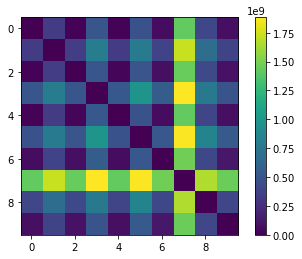

In [11]:
plt.imshow(approx_distance_matrix)
plt.colorbar()

# Compute Euler Characteristic

In [ ]:
from pyEulerCurves import plot_euler_curve, difference_ECC

In [ ]:
# given the ordered list of local contributions
# returns a list of tuples (filtration, euler characteristic)
def euler_characteristic_list_from_all(local_contributions):

    euler_characteristic = []
    old_f, current_characteristic = local_contributions[0]

    for filtration, contribution in local_contributions[1:]:
        if filtration > old_f:
            euler_characteristic.append([old_f, current_characteristic])
            old_f = filtration

        current_characteristic += contribution

    # add last contribution
    if len(local_contributions) > 1:
        euler_characteristic.append([filtration, current_characteristic])

    return euler_characteristic

In [ ]:
list_of_ECC_contributions = [ [ (c[0][0], c[1]) for c in compute_RGB_contributions(img)] 
                             for img in tqdm(np_grayscale_images)] 

In [ ]:
list_of_ECC = [euler_characteristic_list_from_all(contrib) for contrib in list_of_ECC_contributions]

In [ ]:
fig, axs = plt.subplots(2, NUMBER_OF_SAMPLES,
                       figsize=(20, 5))

for i in range(NUMBER_OF_SAMPLES):
    plot_euler_curve(list_of_ECC[i], axs[0,i], with_lines=True)
    
for i in range(NUMBER_OF_SAMPLES):
    plot_euler_curve(list_of_ECC[i+NUMBER_OF_SAMPLES], axs[1,i], with_lines=True)

In [ ]:
distance_matrix = np.zeros((NUMBER_OF_SAMPLES*2, NUMBER_OF_SAMPLES*2))

for i in tqdm(range(len(list_of_ECC))):
    for j in range(i+1, len(list_of_ECC)):
        distance_matrix[i,j] = difference_ECC(list_of_ECC[i], list_of_ECC[j], max_f = 255)
        distance_matrix[j,i] = difference_ECC(list_of_ECC[j], list_of_ECC[i], max_f = 255)

In [ ]:
plt.imshow(distance_matrix)
plt.colorbar()